<table align="center" width=100%>
    <tr>
        <td width="15%">
            <img src="homework.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Take-Home <br>(Day 2)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

#### Import the required libraries

In [1]:
# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt

# import 'Seaborn' 
import seaborn as sns

from mlxtend.feature_selection import SequentialFeatureSelector
# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# import various functions from statsmodels
import statsmodels
import statsmodels.api as sm
from statsmodels.graphics.gofplots import qqplot

# import train-test split
from sklearn.model_selection import train_test_split

# import functions to perform feature selection
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.feature_selection import RFE

# import function to perform linear regression
from sklearn.linear_model import LinearRegression

# import function to perform cross validation
from sklearn.model_selection import cross_val_score

# set the plot size using 'rcParams'
# once the plot size is set using 'rcParams', it sets the size of all the forthcoming plots in the file
# pass width and height in inches to 'figure.figsize' 
plt.rcParams['figure.figsize'] = [15,8]

In [2]:
# pip install mlxtend --user

# to install mlxtend

In [3]:
#from google.colab import drive
#drive.mount('/content/drive')

#### Read the data

Load the csv file and print the first five observations.

In [4]:
# read the data
df_diamond = pd.read_csv("diamond_data.csv")

# display the first five rows of the data
df_diamond.head()

,carat,cut,color,depth,table,price,x,y,z
0,0.30,Good,F,61.1,61.0,682,4.29,4.32,2.63
1,0.72,Ideal,H,62.0,56.0,2443,5.80,5.74,3.58
2,1.71,Premium,J,62.9,58.0,8848,7.64,7.58,4.79
3,1.01,Premium,E,59.2,59.0,7287,6.67,6.60,3.93
4,0.52,Ideal,D,62.7,56.0,1720,5.17,5.14,3.23


In [5]:
from scipy.stats import f_oneway

In [6]:
df_diamond['cut'].value_counts()

Ideal        611
Premium      389
Very Good    358
Good         148
Fair          41
Name: cut, dtype: int64

In [7]:
G=df_diamond.groupby('cut')
G1=G.get_group('Ideal')
G2=G.get_group('Premium')
G3=G.get_group('Very Good')
G4=G.get_group('Good')
G5=G.get_group('Fair')

In [8]:
f_oneway(G1['price'],G2['price'],G3['price'],G4['price'],G5['price'])

F_onewayResult(statistic=5.971831564491989, pvalue=9.09075898329032e-05)

In [9]:
G2['price'].describe()

count      389.000000
mean      4631.156812
std       4301.813540
min        449.000000
25%       1125.000000
50%       3376.000000
75%       6129.000000
max      18439.000000
Name: price, dtype: float64

In [10]:
df_diamond['color'].value_counts()

G    317
E    281
F    274
H    244
D    206
I    141
J     84
Name: color, dtype: int64

<Figure size 360x144 with 0 Axes>

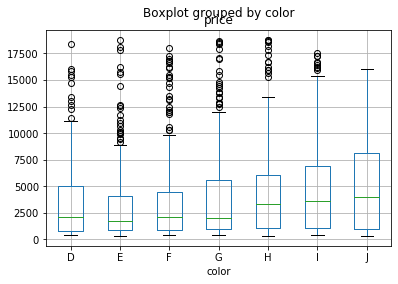

In [11]:
plt.figure(figsize = (5,2))
df_diamond.boxplot(column='price',by='color')

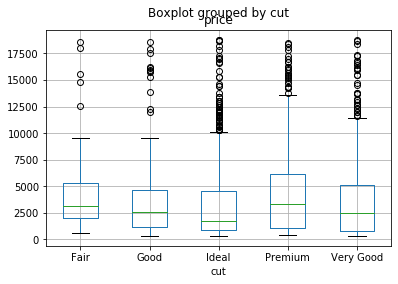

In [12]:
df_diamond.boxplot(column='price',by='cut')

In [13]:
df_diamond.corr()

,carat,depth,table,price,x,y,z
carat,1.000000,0.012993,0.184338,0.928381,0.978489,0.977853,0.978073
depth,0.012993,1.000000,-0.272881,0.003614,-0.044872,-0.048804,0.077009
table,0.184338,-0.272881,1.000000,0.124544,0.200597,0.194526,0.162856
price,0.928381,0.003614,0.124544,1.000000,0.888647,0.889579,0.887618
x,0.978489,-0.044872,0.200597,0.888647,1.000000,0.998768,0.991913
y,0.977853,-0.048804,0.194526,0.889579,0.998768,1.000000,0.991579
z,0.978073,0.077009,0.162856,0.887618,0.991913,0.991579,1.000000


Our objective is to predict the price of the diamond.

**The data definition is as follows:** <br>

**carat**: Weight of the diamond

**cut**: Quality of the cut (Fair, Good, Very Good, Premium, Ideal)

**color**: Diamond color

**depth**: Total depth percentage (it is calculated as: 2 * z / (x + y))

**table**: Width of top of the diamond relative to the widest point 

**price**: Price of a diamond in US dollars (target/dependent variable)

**x**: Length of a diamond in mm

**y**: Width of a diamond in mm

**z**: Depth of a diamond in mm

### Let's begin with some hands-on practice exercises

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. Is the variable representing the width of a diamond skewed? If yes, apply an appropriate technique to make the distribution less skewed </b>
                </font>
            </div>
        </td>
    </tr>
</table>

Skewness:  0.4383878452014628


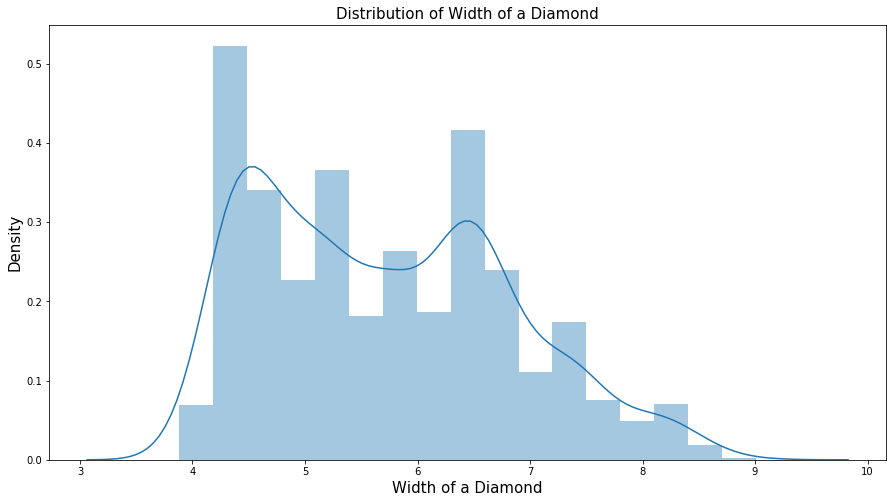

In [14]:
# set the plot size using figure()
# pass width and height in inches to 'figsize' 
plt.figure(figsize = (15,8))

# check the skewness of variable y by plotting distplot 
sns.distplot(df_diamond.y)

# set plot and axes labels
# set text size using 'fontsize'
plt.title('Distribution of Width of a Diamond', fontsize = 15)
plt.xlabel('Width of a Diamond', fontsize = 15)
plt.ylabel('Density', fontsize = 15)

# check the skewness numerically
# print the skewness of the variable 
print("Skewness: ", df_diamond.y.skew())

Apply the log transformation to the variable 'y'.

In [15]:
# apply log transformation
trans_y = np.log(df_diamond.y)

# check the skewness numerically
# print the skewness of the variable 
print("Skewness: ", trans_y.skew())

Skewness:  0.15322643692701352


The coefficient of skewness shows that the skewness of the variable is reduced.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. Build a full model and check whether the errors have a serial correlation or not</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [16]:
# consider the independent variables
# select_dtypes: selects the variable having specified datatype
# include: includes the variables with specified datatype
# drop(): drops specified column(s)/row(s) from the dataframe
# axis: specifies whether to drop labels from index or columns; use 1 for columns and 0 for index

df_num = df_diamond.select_dtypes(include=np.number).drop(["price"],axis=1)

# consider all the categorical variables in the data
# select_dtypes: selects the variable having specified datatype
# include: includes the variables with specified datatype

df_cat = df_diamond.select_dtypes(include="object")

# convert the categorical variable to dummy variable
# get_dummies(): converts the variable to categorical variable
# drop_first=True: indicates n-1 dummy enoding; if set to false indicated one-hot encoding

dummy_variables = pd.get_dummies(df_cat, drop_first=True)

# concatenate the numerical and dummy variables
# axis: specifies whether to drop labels from index or columns; use 1 for columns and 0 for index

X = pd.concat([df_num, dummy_variables],axis=1)

# consider the dependent variable

y = df_diamond["price"]

# split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the testing set

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size = 0.2)

# fit a full model with an intercept using fit()
# add_constant(): adds the intercept term to the model

MLR_model_full = sm.OLS(y_train, sm.add_constant(X_train)).fit()

# print the summary output

print(MLR_model_full.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     635.2
Date:                Fri, 18 Sep 2020   Prob (F-statistic):               0.00
Time:                        13:03:26   Log-Likelihood:                -10691.
No. Observations:                1237   AIC:                         2.142e+04
Df Residuals:                    1220   BIC:                         2.150e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -2.286e+04   9557.212     -2.392

From the above summary, we can observe that the value obtained from the Durbin-Watson test statistic is close to 2 (=1.970). Thus, we conclude that there is no autocorrelation.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. Add the features one-by-one to obtain the set of features which explains the price of a diamond with the highest accuracy
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [17]:
# consider the independent variables
# select_dtypes: selects the variable having specified datatype
# include: includes the variables with specified datatype
# drop(): drops specified column(s)/row(s) from the dataframe
# axis: specifies whether to drop labels from index or columns; use 1 for columns and 0 for index
df_num = df_diamond.select_dtypes(include=np.number).drop(["price"],axis=1)

# consider all the categorical variables in the data
# select_dtypes: selects the variable having specified datatype
# include: includes the variables with specified datatype
df_cat = df_diamond.select_dtypes(include="object")

# convert the categorical variable to dummy variable
# get_dummies(): converts the variable to categorical variable
# drop_first=True: indicates n-1 dummy enoding; if set to false indicated one-hot encoding
dummy_variables = pd.get_dummies(df_cat, drop_first=True)

# concatenate the numerical and dummy variables
# axis: specifies whether to drop labels from index or columns; use 1 for columns and 0 for index
X = pd.concat([df_num, dummy_variables],axis=1)

# dependent variable
y = df_diamond['price']

# split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 10)

# initiate linear regression model to use in feature selection
linreg = LinearRegression()

# Build step forward selection
# pass the regression model to 'estimator'
# pass number of required feartures to 'k_features'. 'best' means that a best possible subset will be selected  
# 'forward=True' performs forward selection method
# 'verbose=2' returns the R-squared scores and the number of features at the corresponding step
# 'scoring=r2' considers R-squared score to select the feature
linreg_forward = sfs(estimator = linreg, k_features = 'best', forward = True,
                     verbose = 2, scoring = 'r2')

# fit the step forward selection on training data using fit()
sfs_forward = linreg_forward.fit(X_train, y_train)

# feature names of the selected feature subsets
sfs_forward.k_feature_names_

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.2s finished

[2020-09-18 13:05:23] Features: 1/16 -- score: 0.8584857132589887[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.0s finished

[2020-09-18 13:05:23] Features: 2/16 -- score: 0.8699556008432495[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.1s finished

[2020-09-18 13:05:23] Features: 3/16 -- score: 0.8762650424322802[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

('carat',
 'depth',
 'table',
 'y',
 'z',
 'cut_Good',
 'cut_Ideal',
 'cut_Premium',
 'cut_Very Good',
 'color_F',
 'color_H',
 'color_I',
 'color_J')

In [18]:
X.shape

(1547, 16)

In [19]:
y.shape

(1547,)

In [20]:
from sklearn.model_selection import cross_val_score

In [21]:
LR=LinearRegression()

The above output returns the best predictors that can be used to predict the price of a diamond.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. Use the 4-fold cross validation method and compute the coefficient of determination for each model
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [22]:
# consider the independent variables
# select_dtypes: selects the variable having specified datatype
# include: includes the variables with specified datatype
# drop(): drops specified column(s)/row(s) from the dataframe
# axis: specifies whether to drop labels from index or columns; use 1 for columns and 0 for index
df_num = df_diamond.select_dtypes(include=np.number).drop(["price"],axis=1)

# consider all the categorical variables in the data
# select_dtypes: selects the variable having specified datatype
# include: includes the variables with specified datatype
df_cat = df_diamond.select_dtypes(include="object")

# convert the categorical variable to dummy variable
# get_dummies(): converts the variable to categorical variable
# drop_first=True: indicates n-1 dummy enoding; if set to false indicated one-hot encoding
dummy_variables = pd.get_dummies(df_cat, drop_first=True)

# concatenate the numerical and dummy variables
# axis: specifies whether to drop labels from index or columns; use 1 for columns and 0 for index
X = pd.concat([df_num, dummy_variables],axis=1)

# dependent variable
y = df_diamond['price']

# split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the testing set
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 10)

# using cross_val_score() for k-fold cross validation
# estimator: pass the machine learning function. Here we are performing linear regression
# pass the X_train and y_train sets
# cv: stands for number of subsets
# scoring: pass the scoring parameter, 'r2' for R-squared 



In [23]:
scores = cross_val_score(LR,X,y,cv=4,scoring ='neg_mean_squared_error')
rmse=np.sqrt(np.abs(scores))
# print the coefficient of determination for each model
np.mean(rmse),np.std(rmse,ddof=1)

(1378.4111993292995, 81.09396882766579)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Identify the most insignificant numerical variable among all the numeric variables in the data
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [24]:
# consider the independent variables
# we need to drop the feature 'price' from X 
# select_dtypes: selects the variable having specified datatype
# include: includes the variables with specified datatype
# drop(): drops specified column(s)/row(s) from the dataframe
# axis: specifies whether to drop labels from index or columns; use 1 for columns and 0 for index
X = df_diamond.select_dtypes(include=[np.number]).drop(["price"],axis=1)

# consider the dependent variables
y = df_diamond["price"]

# split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 10)

# fit a model with an intercept using fit()
# add_constant(): adds the intercept term to the model
LM_model_num = sm.OLS(y_train, sm.add_constant(X_train)).fit()

# print the summary output
print(LM_model_num.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.878
Method:                 Least Squares   F-statistic:                     1479.
Date:                Fri, 18 Sep 2020   Prob (F-statistic):               0.00
Time:                        13:06:30   Log-Likelihood:                -10755.
No. Observations:                1237   AIC:                         2.152e+04
Df Residuals:                    1230   BIC:                         2.156e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.224e+04   9597.190     -1.275      0.2

From the above model summary, we can see that the variable representing the length of a diamond (`x`) has the highest p-value. Thus, `x` is the most  insignificant numerical variable among all the numeric variables.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. Do the residuals obtained from the full model follow a normal distribution?
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

Use the full model build in Q2 to check the normality of residuals.

In [25]:
# print the summary of full model from Q2
print(MLR_model_full.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     635.2
Date:                Fri, 18 Sep 2020   Prob (F-statistic):               0.00
Time:                        13:06:45   Log-Likelihood:                -10691.
No. Observations:                1237   AIC:                         2.142e+04
Df Residuals:                    1220   BIC:                         2.150e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -2.286e+04   9557.212     -2.392

Plot a Q-Q plot, to check the normality of the residuals.

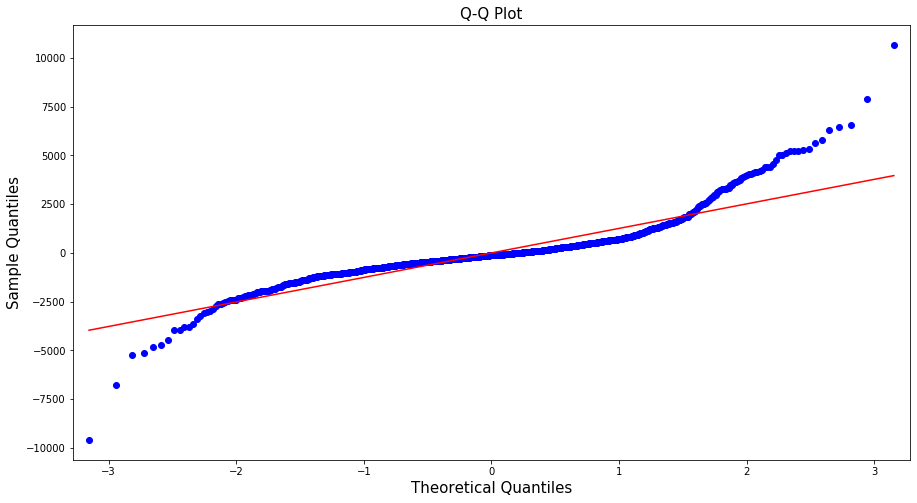

In [26]:
# set the plot size using 'rcParams'
# pass width and height in inches to 'figure.figsize' 
plt.rcParams['figure.figsize'] = [15,8]

# plot the Q-Q plot
# 'r' represents the regression line
# 'resid' returns the residuals 
qqplot(MLR_model_full.resid, line = 'r')

# set plot and axes labels
# set text size using 'fontsize'
plt.title('Q-Q Plot', fontsize = 15)
plt.xlabel('Theoretical Quantiles', fontsize = 15)
plt.ylabel('Sample Quantiles', fontsize = 15)

# display the plot
plt.show()

As, the blue points are varying from the regression line, we can say that the residuals are not normal.

In [27]:
from scipy.stats import shapiro

shapiro(MLR_model_full.resid)

(0.8381052017211914, 1.1173317168630661e-33)

The p_val of shapiro test is less than , which means thats it reject the H0(NULL hypothesis). Hence we can conclude that the residuals of the full model doesn't follow a normal distribution.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. Is it possible to make the residuals normal? If yes, do the needful
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

We can satisfy the condition of normality for residuals by transforming the data. Transform the target variable, by taking log-transformation.

In [28]:
# consider the independent variables
# select_dtypes: selects the variable having specified datatype
# include: includes the variables with specified datatype
# drop(): drops specified column(s)/row(s) from the dataframe
# axis: specifies whether to drop labels from index or columns; use 1 for columns and 0 for index
df_num = df_diamond.select_dtypes(include=np.number).drop(["price"],axis=1)

# consider all the categorical variables in the data
# select_dtypes: selects the variable having specified datatype
# include: includes the variables with specified datatype
df_cat = df_diamond.select_dtypes(include="object")

# convert the categorical variable to dummy variable
# get_dummies(): converts the variable to categorical variable
# drop_first=True: indicates n-1 dummy enoding; if set to false indicated one-hot encoding
dummy_variables = pd.get_dummies(df_cat, drop_first=True)

# concatenate the numerical and dummy variables
# axis: specifies whether to drop labels from index or columns; use 1 for columns and 0 for index
X = pd.concat([df_num, dummy_variables],axis=1)

# dependent variable
y = df_diamond['price']

# split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 10)

# build a model on training dataset
# fit() is used to fit the OLS model
MLR_model_after_transform = sm.OLS(np.log(y_train), X_train).fit()

#MLR_model_after_transform.summary()

Plot a Q-Q plot, to check the normality of the residuals after transformation.

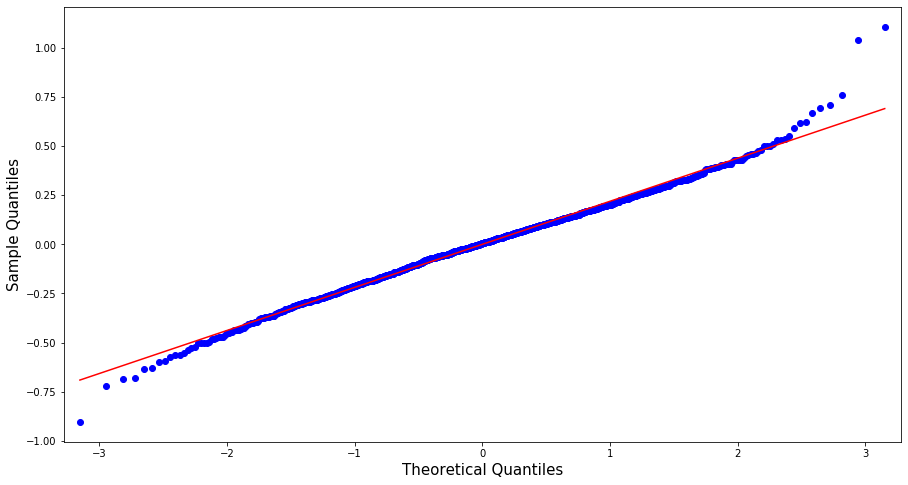

In [29]:
# set the plot size using 'rcParams'
# pass width and height in inches to 'figure.figsize' 
plt.rcParams['figure.figsize'] = [15,8]

# plot the Q-Q plot
# 'r' represents the regression line
# 'resid' returns the residuals 
qqplot(MLR_model_after_transform.resid, line='r')

# set plot and axes labels
# set text size using 'fontsize'
#plt.title('Q-Q Plot', fontsize = 15)
plt.xlabel('Theoretical Quantiles', fontsize = 15)
plt.ylabel('Sample Quantiles', fontsize = 15)

# display the plot
plt.show()

The above plot shows that most of the points lie on or near the regression line. Thus, we can say that the residuals are normally distributed.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. Consider the full model and remove the variables one-by-one to obtain the set of seven most significant variables
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [30]:
# consider the independent variables
# select_dtypes: selects the variable having specified datatype
# include: includes the variables with specified datatype
# drop(): drops specified column(s)/row(s) from the dataframe
# axis: specifies whether to drop labels from index or columns; use 1 for columns and 0 for index
df_num = df_diamond.select_dtypes(include=np.number).drop(["price"],axis=1)

# consider all the categorical variables in the data
# select_dtypes: selects the variable having specified datatype
# include: includes the variables with specified datatype
df_cat = df_diamond.select_dtypes(include="object")

# convert the categorical variable to dummy variable
# get_dummies(): converts the variable to categorical variable
# drop_first=True: indicates n-1 dummy enoding; if set to false indicated one-hot encoding
dummy_variables = pd.get_dummies(df_cat, drop_first=True)

# concatenate the numerical and dummy variables
# axis: specifies whether to drop labels from index or columns; use 1 for columns and 0 for index
X = pd.concat([df_num, dummy_variables],axis=1)

# dependent variable
y = df_diamond['price']

# split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 10)

# initiate linear regression model to use in feature selection
linreg = LinearRegression()

# Build step backward selection
# pass the regression model to 'estimator'
# pass number of required feartures to 'k_features'  
# 'forward=False' performs backward selection method
# 'verbose=1' returns the number of features at the corresponding step
# 'verbose=2' returns the R-squared scores and the number of features at the corresponding step
# 'scoring=r2' considers R-squared score to select the feature
linreg_backward = sfs(estimator = linreg, k_features = 7, forward = False,
                     verbose = 2, scoring = 'r2')

# fit the step backward selection on training data using fit()
sfs_backward = linreg_backward.fit(X_train, y_train)

# feature names of the selected feature subsets
sfs_backward.k_feature_names_

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.1s finished

[2020-09-18 13:10:01] Features: 15/7 -- score: 0.8871942591343907[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.1s finished

[2020-09-18 13:10:01] Features: 14/7 -- score: 0.8881058489311698[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.0s finished

[2020-09-18 13:10:02] Features: 13/7 -- score: 0.8882079324599305[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

('carat', 'depth', 'z', 'cut_Ideal', 'color_H', 'color_I', 'color_J')

The output shows the seven most significant features in the dataset. 

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9. Identify the colors of a diamond that are not significant while predicting the price?
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [31]:
# consider the independent variables
X = df_diamond['color']

# convert the categorical variable to a dummy variable
# get_dummies(): converts the variable to categorical variable
# prefix: specifies the prefix added to each level while creating a dummy variable for it
# drop_first=True: indicates n-1 dummy enoding; if set to false indicated one-hot encoding
X_dummy = pd.get_dummies(X, prefix="color", drop_first=True)

# consider the dependent variable
y = df_diamond["price"]

# fit a model with an intercept using fit()
# add_constant(): adds the intercept term to the model
SLR_model = sm.OLS(y, sm.add_constant(X_dummy)).fit()

# print the summary output
print(SLR_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     6.554
Date:                Fri, 18 Sep 2020   Prob (F-statistic):           7.55e-07
Time:                        13:10:13   Log-Likelihood:                -15051.
No. Observations:                1547   AIC:                         3.012e+04
Df Residuals:                    1540   BIC:                         3.015e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3590.7087    283.805     12.652      0.0

The categorical variable 'color' explains a 2.5% variation in the price of a diamond. We can see that the p-values of color `E`, `F` and `G` are greater than 0.05. Thus, we say that these colors have no significance in predicting the price. The parameter 'const' represents the color 'D'.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>10. Build a regression model on the five features obtained by eliminating the features recursively 
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

Apply RFE on the dataset to obtain the five features.

In [32]:
# consider the independent variables
# select_dtypes: selects the variable having specified datatype
# include: includes the variables with specified datatype
# drop(): drops specified column(s)/row(s) from the dataframe
# axis: specifies whether to drop labels from index or columns; use 1 for columns and 0 for index
df_num = df_diamond.select_dtypes(include=np.number).drop(["price"],axis=1)

# consider all the categorical variables in the data
# select_dtypes: selects the variable having specified datatype
# include: includes the variables with specified datatype
df_cat = df_diamond.select_dtypes(include="object")

# convert the categorical variable to dummy variable
# get_dummies(): converts the variable to categorical variable
# drop_first=True: indicates n-1 dummy enoding; if set to false indicated one-hot encoding
dummy_variables = pd.get_dummies(df_cat, drop_first=True)

# concatenate the numerical and dummy variables
# axis: specifies whether to drop labels from index or columns; use 1 for columns and 0 for index
X = pd.concat([df_num, dummy_variables],axis=1)

# dependent variable
y = df_diamond['price']

# split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 10)

# initiate linear regression model to use in feature selection
linreg_rfe = LinearRegression()

# Build the RFE model
# pass the regression model to 'estimator'
# pass number of required features to 'n_features_to_select'
# if we do not pass the number of features, RFE considers half of the features
rfe_model = RFE(estimator=linreg_rfe, n_features_to_select = 5)

# fit the RFE model on the training dataset using fit()
rfe_model = rfe_model.fit(X_train, y_train)

# create a series containing feature and its corresponding rank obtained from RFE
# 'ranking_' returns the rank of each variable after applying RFE
# pass the ranks as the 'data' of a series
# 'index' assigns feature names as index of a series 
feat_index = pd.Series(data = rfe_model.ranking_, index = X_train.columns)
print(feat_index)

# select the features with rank = 1
# 'index' returns the indices of a series (i.e. features with rank=1) 
signi_feat_rfe = feat_index[feat_index==1].index

# print the significant features obtained from RFE
print(signi_feat_rfe)

carat             1
depth             8
table            11
x                 1
y                 1
z                 1
cut_Good          7
cut_Ideal         4
cut_Premium       6
cut_Very Good     5
color_E          12
color_F           9
color_G          10
color_H           3
color_I           2
color_J           1
dtype: int32
Index(['carat', 'x', 'y', 'z', 'color_J'], dtype='object')


Let us build the model using the features obtained above. 

In [33]:
# store the X_train with significant variables in new_X_train
X_train_rfe = X_train[['carat', 'x', 'y', 'z', 'color_J']]

# fit a full model with an intercept using fit()
# add_constant(): adds the intercept term to the model
MLR_model_rfe = sm.OLS(y_train, sm.add_constant(X_train_rfe)).fit()

# print the summary output
print(MLR_model_rfe.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.884
Method:                 Least Squares   F-statistic:                     1878.
Date:                Fri, 18 Sep 2020   Prob (F-statistic):               0.00
Time:                        13:12:07   Log-Likelihood:                -10725.
No. Observations:                1237   AIC:                         2.146e+04
Df Residuals:                    1231   BIC:                         2.149e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5637.1528    704.307      8.004      0.0

The model build on the five features obtained from RFE explains a 88.4% variation in the price.